In [57]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [58]:
data=pd.read_csv('train.csv')
print(data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [59]:
print(len(data.columns))
print(len(data.index))
print(data.columns)
print(data['Survived'])

12
891
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [60]:
x=pd.DataFrame(data,columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp','Parch', 'Ticket', 'Fare'])
y=pd.DataFrame(data,columns=['Survived'])
print(x)

     PassengerId  Pclass                                               Name  \
0              1       3                            Braund, Mr. Owen Harris   
1              2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2              3       3                             Heikkinen, Miss. Laina   
3              4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4              5       3                           Allen, Mr. William Henry   
5              6       3                                   Moran, Mr. James   
6              7       1                            McCarthy, Mr. Timothy J   
7              8       3                     Palsson, Master. Gosta Leonard   
8              9       3  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)   
9             10       2                Nasser, Mrs. Nicholas (Adele Achem)   
10            11       3                    Sandstrom, Miss. Marguerite Rut   
11            12       1                           B

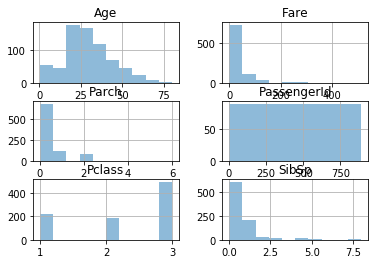

In [61]:
x.hist(bins=10,alpha=0.5)
plt.show()

## preprocessing stage

In [193]:
#x['Cabin']

In [63]:
from sklearn import preprocessing
encode=preprocessing.LabelEncoder()
encode.fit(x['Name'])
x['Name']=encode.transform(x['Name'])
encode.fit(x['Sex'])
x['Sex']=encode.transform(x['Sex'])
encode.fit(x['Ticket'])
x['Ticket']=encode.transform(x['Ticket'])
print(x)
#encode.fit(x['Cabin'])
#x['Cabin']=encode.transform(x['Cabin'])


     PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket      Fare
0              1       3   108    1  22.0      1      0     523    7.2500
1              2       1   190    0  38.0      1      0     596   71.2833
2              3       3   353    0  26.0      0      0     669    7.9250
3              4       1   272    0  35.0      1      0      49   53.1000
4              5       3    15    1  35.0      0      0     472    8.0500
5              6       3   554    1   NaN      0      0     275    8.4583
6              7       1   515    1  54.0      0      0      85   51.8625
7              8       3   624    1   2.0      3      1     395   21.0750
8              9       3   412    0  27.0      0      2     344   11.1333
9             10       2   576    0  14.0      1      0     132   30.0708
10            11       3   727    0   4.0      1      1     616   16.7000
11            12       1    95    0  58.0      0      0      38   26.5500
12            13       3   729    1  2

In [64]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

#x=x.reshape(8910,1)
#print(x['Age'])
A=np.array(x['Age'])
A=A.reshape(len(A),1)
k=imp_mean.fit(A)
L=imp_mean.transform(A)
#print(y)
x.drop(['Age'],axis=1)
x['Age']=L
print(x)

     PassengerId  Pclass  Name  Sex        Age  SibSp  Parch  Ticket      Fare
0              1       3   108    1  22.000000      1      0     523    7.2500
1              2       1   190    0  38.000000      1      0     596   71.2833
2              3       3   353    0  26.000000      0      0     669    7.9250
3              4       1   272    0  35.000000      1      0      49   53.1000
4              5       3    15    1  35.000000      0      0     472    8.0500
5              6       3   554    1  29.699118      0      0     275    8.4583
6              7       1   515    1  54.000000      0      0      85   51.8625
7              8       3   624    1   2.000000      3      1     395   21.0750
8              9       3   412    0  27.000000      0      2     344   11.1333
9             10       2   576    0  14.000000      1      0     132   30.0708
10            11       3   727    0   4.000000      1      1     616   16.7000
11            12       1    95    0  58.000000      

In [71]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1 ,stratify=y)
print(np.shape(y_train))
print(np.shape(x_train))
print(y_train)




(712, 1)
(712, 9)
     Survived
368         1
542         0
49          0
667         0
297         0
727         1
399         1
151         1
783         0
671         0
546         1
441         0
215         1
603         0
655         0
205         0
308         0
445         1
649         1
534         0
166         1
851         0
502         0
597         0
442         0
571         1
357         0
449         1
845         0
561         0
..        ...
409         0
772         0
537         1
336         0
344         0
756         0
757         0
868         0
621         1
295         0
814         0
678         0
519         0
618         1
699         0
696         0
841         0
632         1
76          0
267         1
23          1
651         1
389         1
758         0
56          1
650         0
744         1
265         0
337         1
464         0

[712 rows x 1 columns]


# using Logistic Regression

In [72]:
model=LogisticRegression()
model.fit(x_train,y_train)

c:\users\shoukkiya ashraf\miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\shoukkiya ashraf\miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
y_predict = model.predict(x_test)
print(model.score(x_test,y_test))

0.8044692737430168


In [80]:
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0]


# Using SVM

In [82]:
from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
norm.fit(x_train)
x_train_std = norm.transform(x_train)
#normalizing the values between -1  and 0
norm.fit(x_test)
x_test_std = norm.transform(x_test)

c:\users\shoukkiya ashraf\miniconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\shoukkiya ashraf\miniconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
c:\users\shoukkiya ashraf\miniconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\shoukkiya ashraf\miniconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [99]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.02 ,penalty='l1' , dual=False)
lsvc.fit(x_train_std,y_train)

c:\users\shoukkiya ashraf\miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=0.02, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0)

In [100]:
y_predict_svc = lsvc.predict(x_test_std)
from sklearn import metrics
print(metrics.f1_score(y_test,y_predict_svc,average='micro'))

0.8044692737430168


In [107]:
print(y_predict)
print(y_predict_svc)
print(lsvc.score(x_test_std,y_test))

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0]
[0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 0 1
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0]
0.8044692737430168


# Using non-linear SVM

In [111]:
from  sklearn.svm import SVC
k_svc = SVC(kernel='rbf' , random_state=1 , gamma=.10 ,C=10)
k_svc.fit(x_train_std,y_train)

c:\users\shoukkiya ashraf\miniconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False)

In [112]:
y_predict_ksvc = k_svc.predict(x_test_std)
print(k_svc.score(x_test_std,y_test))

0.8491620111731844


In [108]:
print(y_predict_ksvc)

[0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0
 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0]
